# BANK MARKETING

Project Description

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.


In [6]:
#importing libraries
import pandas as pd
import numpy as np                     
import seaborn as sns                 
import matplotlib.pyplot as plt 
import seaborn as sn                   
%matplotlib inline
import warnings                        
warnings.filterwarnings("ignore")

In [7]:
#loading the data
train = pd.read_csv('train.csv')
train


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In the above train dataset there is total 18 columns and 31647 rows 

In [9]:
test = pd.read_csv('test.csv')
test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In the test dataset there is total 13564 rows and 17 columns 

In [10]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [11]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

It can be infered that subscribed is the target variable as it is not present in the test dataset. Let's look at the shape of the dataset.

In [12]:
train.shape, test.shape

((31647, 18), (13564, 17))

We have 17 independent variables and 1 target variable, i.e. subscribed in the train dataset. We have similar features in the test dataset as the train dataset except the subscribed. We will predict the subscribed with the help of model built using the train data.

Next, let's look at how many categorical and numerical variables are there in our dataset. We will look at their data types

In [13]:
# Print data types for each variable
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

We can see there are two format of data types:

object: Object format means variables are categorical. Categorical variables in our dataset are: job, marital, education, default, housing, loan, contact, month, poutcome, subscribed

int64: It represents the integer variables. Integer variables in our dataset are: ID, age, balance, day, duration, campaign, pdays, previous

In [14]:
#printing first five rows of the dataset
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


Univariate Analysis

Now Let's look at the distribution of our target variable, i.e. subscribed. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

In [15]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [16]:
# Normalize can be set to True to print proportions instead of number 
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

<AxesSubplot:>

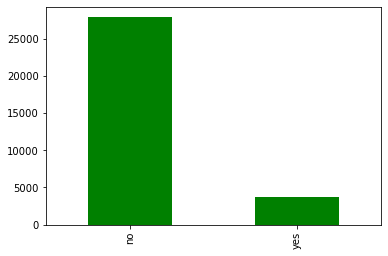

In [17]:
# plotting the bar plot of frequencies
train['subscribed'].value_counts().plot.bar(color="green")

So, 3715 users out of total 31647 have subscribed which is around 12%. Let's now explore the variables to have a better understanding of the dataset. We will first explore the variables individually using univariate analysis, then we will look at the relation between various independent variables and the target variable. We will also look at the correlation plot to see which variables affects the target variable most.

Let's first look at the distribution of age variable to see how many people belongs to a particular age group.

<AxesSubplot:xlabel='age', ylabel='Density'>

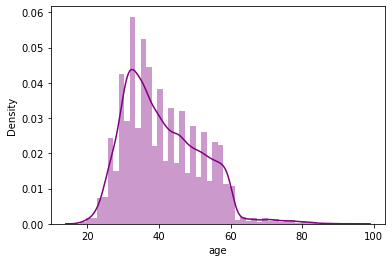

In [18]:
sn.distplot(train["age"],color="purple")

We can infer that most of the clients fall in the age group between 20-60. Now let's look at what are the different types of jobs of the clients. As job is a categorical variable, we will look at its frequency table

<AxesSubplot:>

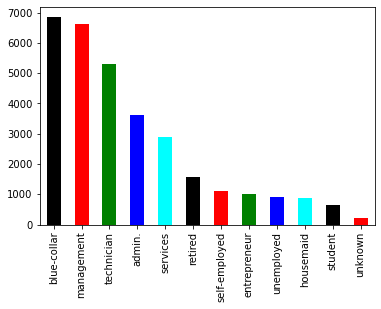

In [19]:
train['job'].value_counts().plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])

We see that most of the clients belongs to blue-collar job and the students are least in number as students generally do not take a term deposit. Let's also look at how many clients have default history.

<AxesSubplot:>

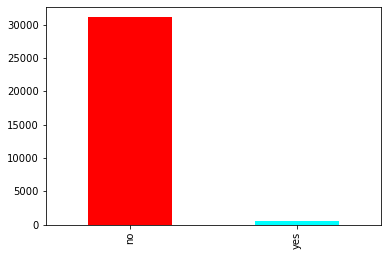

In [20]:
train['default'].value_counts().plot.bar(color=['red', 'cyan'])

More than 90% of the clients have no default history. Now we will explore these variables against the target variable using bivariate analysis. We will make use of scatter plots for continuous or numeric variables and crosstabs for the categorical variables. Let's start with job and subscribed variable

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

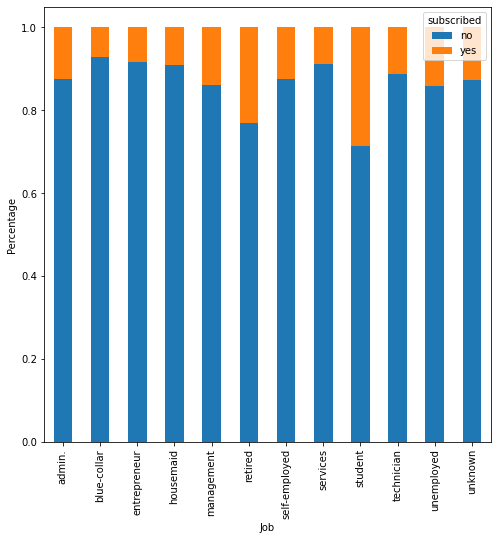

In [21]:
#Bivariate Analysis
print(pd.crosstab(train['job'],train['subscribed']))

job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')


From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

Next, let's explore the default variable against the subscribed variable.

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

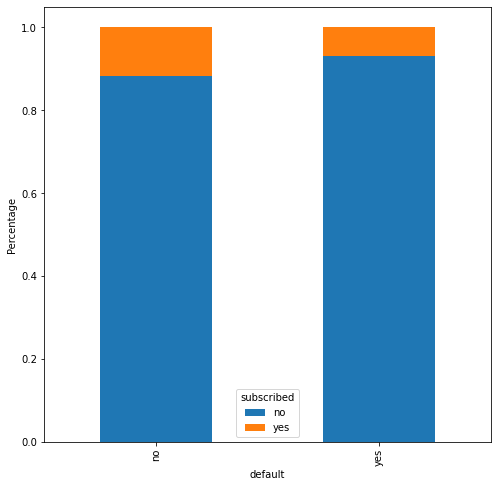

In [22]:
print(pd.crosstab(train['default'],train['subscribed']))

default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

Let's now look at how correlated our numerical variables are. We will see the correlation between each of these variables and the variable which have high negative or positive values are correlated. By this we can get an overview of the variables which might affect our target variable. We will convert our target variable into numeric values first.

In [23]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

<AxesSubplot:>

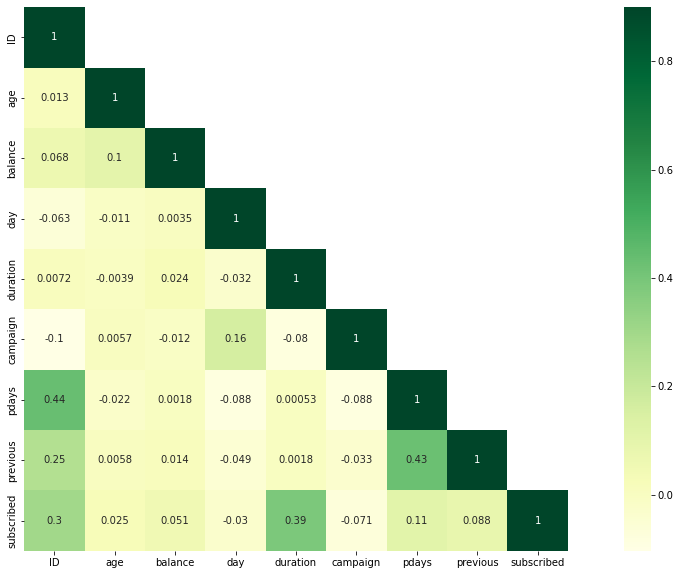

In [24]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGn")

We can infer that duration of the call is highly correlated with the target variable. This can be verified as well. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

Next we will look for any missing values in the dataset.

In [25]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

There are no missing values in the train dataset.

Next, we will start to build our predictive model to predict whether a client will subscribe to a term deposit or not.

As the sklearn models takes only numerical input, we will convert the categorical variables into numerical values using dummies. We will remove the ID variables as they are unique values and then apply dummies. We will also remove the target variable and keep it in a separate variable.

In [26]:
#Model Building
target = train['subscribed']
train = train.drop('subscribed',1)

In [27]:
# applying dummies on the train dataset
train = pd.get_dummies(train)

Now, its time to build our model. We will split the train data into training and validation set so that we will be able to validate the results of our model on the validation set. We will keep 20% data as validation set and rest as the training set.

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# splitting into train and validation with 20% data in validation set and 80% data in train set.
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)

Now our data is ready. Its time to build our model and check its performance. Logistic regression is used for classification problems and as it is a classification problem let's first build a Logistic Regression model.

In [30]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [31]:
# defining the logistic regression model
lreg = LogisticRegression()

In [32]:
# fitting the model on  X_train and y_train
lreg.fit(X_train,y_train)

LogisticRegression()

In [33]:
# making prediction on the validation set
prediction = lreg.predict(X_val)

Now we will evaluate how accurate our predictions are. As the evaluation metric for this problem is accuracy, let's calculate the accuracy on validation set.

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
# calculating the accuracy score
accuracy_score(y_val, prediction)

0.8870458135860979

Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
# defining the decision tree model with depth of 4, you can tune it further to improve the accuracy score
clf = DecisionTreeClassifier(max_depth=4, random_state=0)


In [38]:
# fitting the decision tree model
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [39]:
# making prediction on the validation set
predict = clf.predict(X_val)

In [40]:
# calculating the accuracy score
accuracy_score(y_val, predict)

0.9042654028436019